In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [22]:
redlining = gpd.read_file('../data/shapes/mappinginequality.json').to_crs('EPSG:26916')
chicago = gpd.read_file('../data/shapes/chicago_boundaries.geojson').to_crs('EPSG:26916')
crashes = pd.read_csv('../data/crash_data.csv')
crashes = gpd.GeoDataFrame(crashes, geometry=gpd.points_from_xy(x=crashes.longitude, y=crashes.latitude), crs='EPSG:4326').to_crs("EPSG:26916")

In [39]:
# Only keep redlining geometries that intersect the chicago geometries
bounds = chicago.dissolve().bounds
#redlining_2 = redlining[redlining.intersects(chicago.dissolve())]


In [46]:
adjst = 0.00
redlining_2 = redlining.clip_by_rect(xmin=bounds.loc[0, 'minx']*(1-adjst), ymin=bounds.loc[0, 'miny']*(1-adjst), xmax=bounds.loc[0, 'maxx']*(1+adjst), ymax=bounds.loc[0, 'maxy']*(1+adjst))
redlining_2 = redlining[~redlining_2.is_empty]
redlining_2['grade'] = redlining_2['grade'].fillna('Commercial')

c:\Python311\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [47]:
redlining_2.grade[redlining_2.grade == 'C '] = 'C'

C:\Users\wimer\AppData\Local\Temp\ipykernel_22656\3016056675.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  redlining_2.grade[redlining_2.grade == 'C '] = 'C'
C:\Users\wimer\AppData\Local\Temp\ipykernel_22656\3016056675.py:1: SettingWit

In [124]:
redlining_2

,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry,cent_x,cent_y
2014,11474,Chicago,IL,True,Definitely Declining,C,315,True,False,False,#ffff00,"POLYGON ((427746.151 4630123.825, 427744.408 4...",427250.545206,4.630538e+06
2034,1204,Chicago,IL,True,Best,A,A27,True,False,False,#76a865,"MULTIPOLYGON (((437264.138 4649998.216, 437398...",437310.229361,4.650314e+06
2035,1205,Chicago,IL,True,Best,A,A28,True,False,False,#76a865,"MULTIPOLYGON (((437669.510 4649001.958, 438017...",436455.847263,4.650200e+06
2036,1199,Chicago,IL,True,Best,A,A29,True,False,False,#76a865,"MULTIPOLYGON (((438017.905 4648772.388, 438020...",438489.235850,4.648924e+06
2038,1368,Chicago,IL,True,Best,A,A30,True,False,False,#76a865,"MULTIPOLYGON (((447002.488 4643326.588, 446999...",446676.340681,4.644256e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,11229,Chicago,IL,True,Commercial,Commercial,Commercial,False,True,False,#000000,"MULTIPOLYGON (((449387.680 4616414.006, 449288...",446039.398978,4.636594e+06
2705,11468,Chicago,IL,True,Commercial,Commercial,Commercial,False,True,False,#000000,"POLYGON ((424226.018 4628715.714, 424215.554 4...",425184.875095,4.628984e+06
2707,11482,Chicago,IL,True,Commercial,Commercial,Commercial,False,True,False,#000000,"MULTIPOLYGON (((427842.818 4628429.517, 427988...",427776.101982,4.629671e+06
2708,11493,Chicago,IL,True,Commercial,Commercial,Commercial,False,True,False,#000000,"MULTIPOLYGON (((421590.926 4627974.662, 421410...",423025.430848,4.628949e+06


In [95]:
#crashes = crashes.drop('Unnamed: 0', axis=1)
fatal_crashes = crashes.copy()[crashes['injuries_fatal'] > 0]

fatal_crashes

,Unnamed: 0,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,...,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,latitude,longitude,geometry
889,889,68d8c97d8452b9403fc8fdf9a7edff3d55ad17381b7437...,2022-07-04T22:09:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,2.0,1.0,1.0,0.0,0.0,1.0,0.0,41.770837,-87.612298,POINT (449109.296 4624514.216)
959,959,a637cff8c13da7c56d812d873690d372115b860a8ce829...,2022-07-04T16:42:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,2.0,1.0,0.0,1.0,0.0,4.0,0.0,41.730188,-87.551101,POINT (454166.715 4619966.751)
1075,1075,db9b02e8206b705c796645983d39ffe1b302f476936c0f...,2022-07-04T03:35:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PEDESTRIAN,NOT DIVIDED,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,41.833431,-87.724129,POINT (439873.032 4631535.982)
1099,1099,24481b5454d7ebe3da4b9ac6e15788187aa68d31561016...,2022-07-04T01:09:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,ALLEY,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,41.792356,-87.643746,POINT (446513.352 4626922.443)
1486,1486,cc6319d6092e72b7f20a5a87a2f5a981710b89585edff8...,2022-07-02T17:50:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,NOT DIVIDED,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,41.872498,-87.725253,POINT (439816.324 4635874.204)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825259,825259,e28a79b2633cb6bc4e200e9539e588fbfc6a372bd3caf2...,2018-10-24T20:30:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,41.788475,-87.625397,POINT (448034.832 4626480.320)
826873,826873,039b6104d975759e57c9de9eaafc85ea4de46693ddf33d...,2018-10-19T20:14:00.000,30,NO CONTROLS,NOT FUNCTIONING,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,41.899809,-87.667875,POINT (444601.336 4638867.850)
827498,827498,d93a0c9b36174b08bb31cfb51cf2bd815e3ade51a1a680...,2018-10-18T11:18:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),...,2.0,1.0,1.0,0.0,0.0,1.0,0.0,41.790616,-87.654636,POINT (445607.116 4626736.108)
828807,828807,5a8a2ebd513d6c7806052335042c1e8dd0a38d09735770...,2018-10-14T10:25:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),...,6.0,1.0,0.0,5.0,0.0,3.0,0.0,41.815605,-87.684216,POINT (443171.414 4629529.625)


<Axes: >

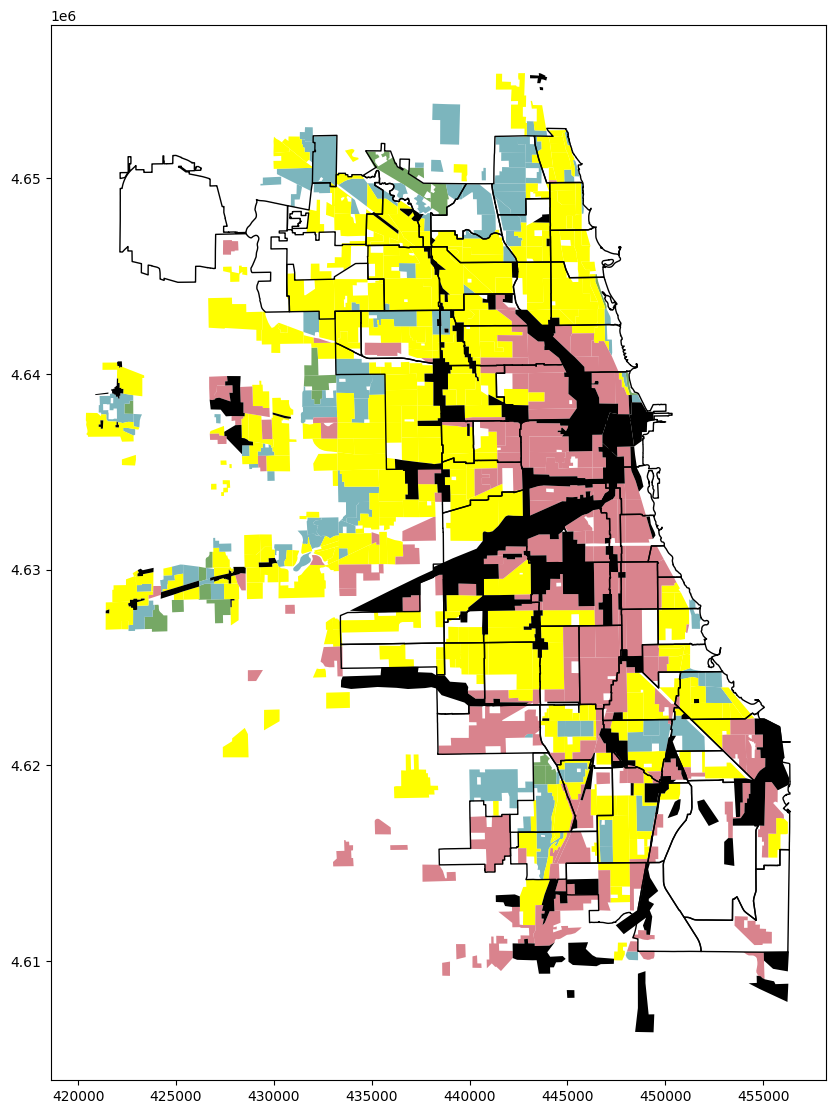

In [9]:
fig, ax = plt.subplots(figsize=(10, 20))
redlining_2.plot(ax=ax, legend=True, color=redlining_2.fill, edgecolor='none')
chicago.plot(facecolor='none', ax=ax)
#fatal_crashes.plot(ax=ax, alpha=1, markersize=.3, color='purple')

In [8]:
redlining_3 = redlining_2.sjoin(fatal_crashes, how='inner', op='intersects')

C:\Users\wimer\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


dtype('float64')

<Axes: >

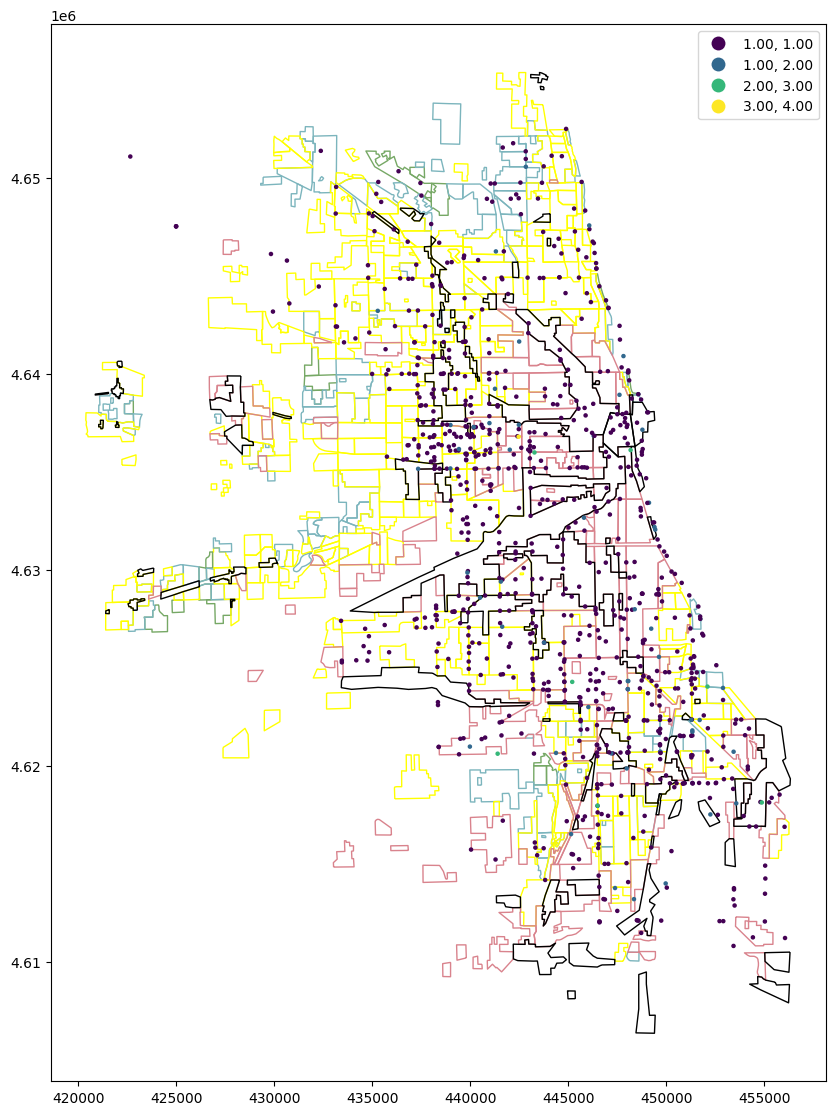

In [112]:
fig, ax = plt.subplots(figsize=(10, 20))
#chicago.dissolve().plot(facecolor='none', ax=ax)
redlining_2.plot(ax=ax, legend=True, edgecolor=redlining_2.fill, facecolor='none')
fatal_crashes.plot('injuries_fatal', ax=ax, alpha=1, markersize=5, legend=True, scheme='fisherjenks', k=4)

In [132]:
merged = fatal_crashes[['injuries_fatal', 'geometry']].sjoin(redlining_2[['area_id', 'geometry']], predicate='within')
merged = redlining_2.merge(merged.drop(['geometry'], axis=1).groupby('area_id').sum().reset_index(), on='area_id')

merged[['grade', 'injuries_fatal']].groupby('grade').mean()

,injuries_fatal
grade,
A,2.333333
B,2.320000
C,3.238938
Commercial,57.500000
D,3.753623


<Axes: >

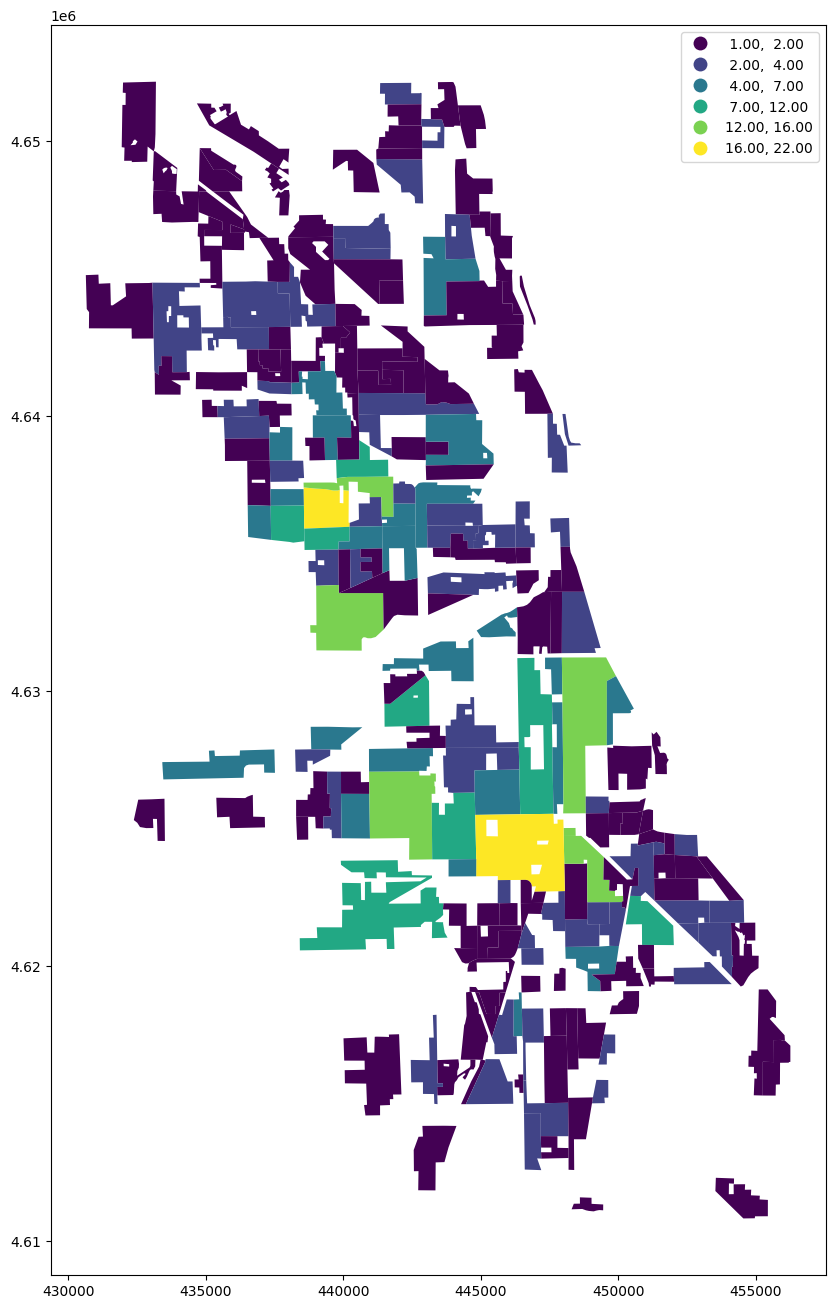

In [139]:
merged[merged['grade'] != 'Commercial'].plot('injuries_fatal', figsize=(10, 20), legend=True, scheme='fisherjenks', k=6)

In [13]:
import pygris
tracts = pygris.tracts(county='cook', state='il', cb=True).to_crs('EPSG:26916')
centroids = tracts.geometry.centroid
tracts['cent_x'] = centroids.x
tracts['cent_y'] = centroids.y

Using the default year of 2021
Using FIPS code '17' for input 'il'
Using FIPS code '031' for input 'cook'


C:\Users\wimer\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


<Axes: >

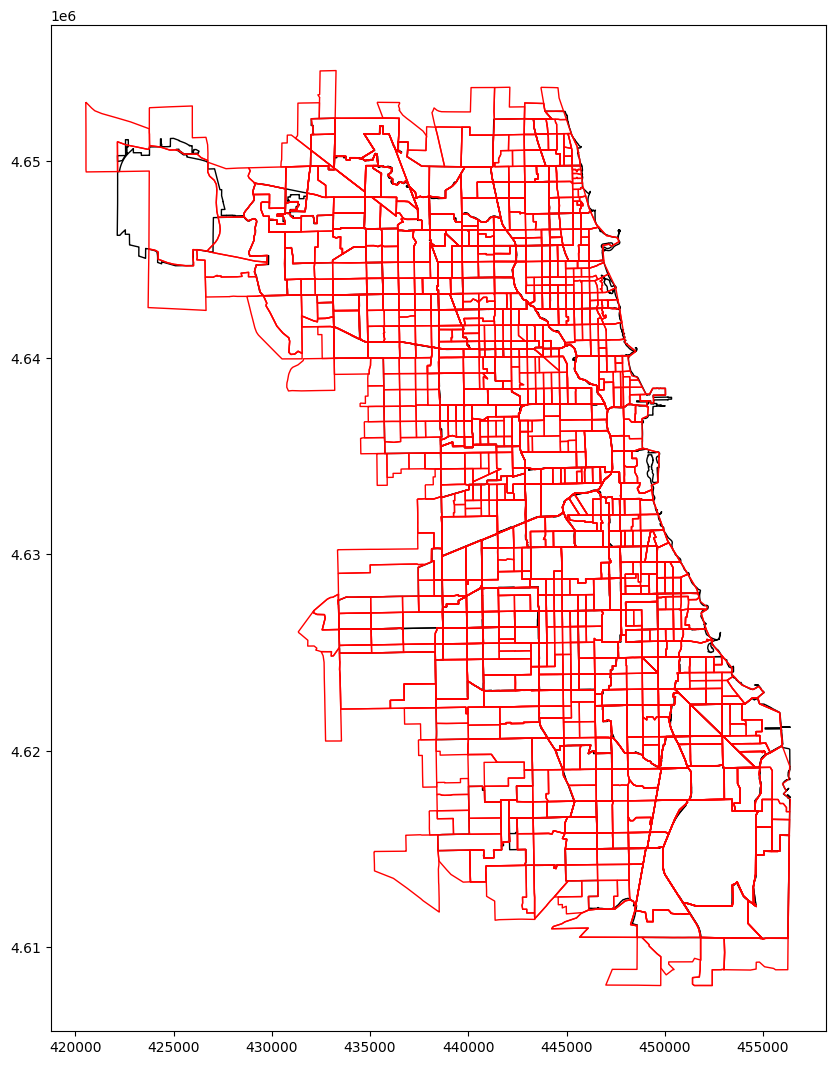

In [15]:
chicago_tracts = tracts.sjoin(chicago, how='inner', op='intersects')

fig, ax = plt.subplots(figsize=(10, 20))
chicago.plot(ax=ax, facecolor='none')
chicago_tracts.plot(ax=ax, facecolor='none', edgecolor='red')

In [ ]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,17,031,230200,1400000US17031230200,17031230200,2302,Census Tract 2302,IL,Cook County,Illinois,CT,214283,0,"POLYGON ((440836.466 4640428.242, 441104.949 4..."
2,17,031,320400,1400000US17031320400,17031320400,3204,Census Tract 3204,IL,Cook County,Illinois,CT,804124,649677,"POLYGON ((447910.573 4636870.141, 448186.837 4..."
3,17,031,828701,1400000US17031828701,17031828701,8287.01,Census Tract 8287.01,IL,Cook County,Illinois,CT,6792132,0,"POLYGON ((446548.655 4600384.550, 446552.060 4..."
4,17,031,310400,1400000US17031310400,17031310400,3104,Census Tract 3104,IL,Cook County,Illinois,CT,124462,0,"POLYGON ((445765.404 4634417.880, 445972.355 4..."
5,17,031,810100,1400000US17031810100,17031810100,8101,Census Tract 8101,IL,Cook County,Illinois,CT,723779,0,"POLYGON ((442875.108 4653092.815, 442882.388 4..."


In [50]:
redlining_cents = redlining_2.geometry.centroid
redlining_2['cent_x'] = redlining_cents.x
redlining_2['cent_y'] = redlining_cents.y


redlining_cents = redlining_2[['grade', 'cent_x', 'cent_y']].dropna()
tracts_cents = chicago_tracts[['cent_x', 'cent_y']]

c:\Python311\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Python311\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [54]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(1, weights='distance')
classifier.fit(redlining_cents[['cent_x', 'cent_y']], redlining_cents.grade)
chicago_tracts['pred_grade'] = classifier.predict(tracts_cents)

<Axes: >

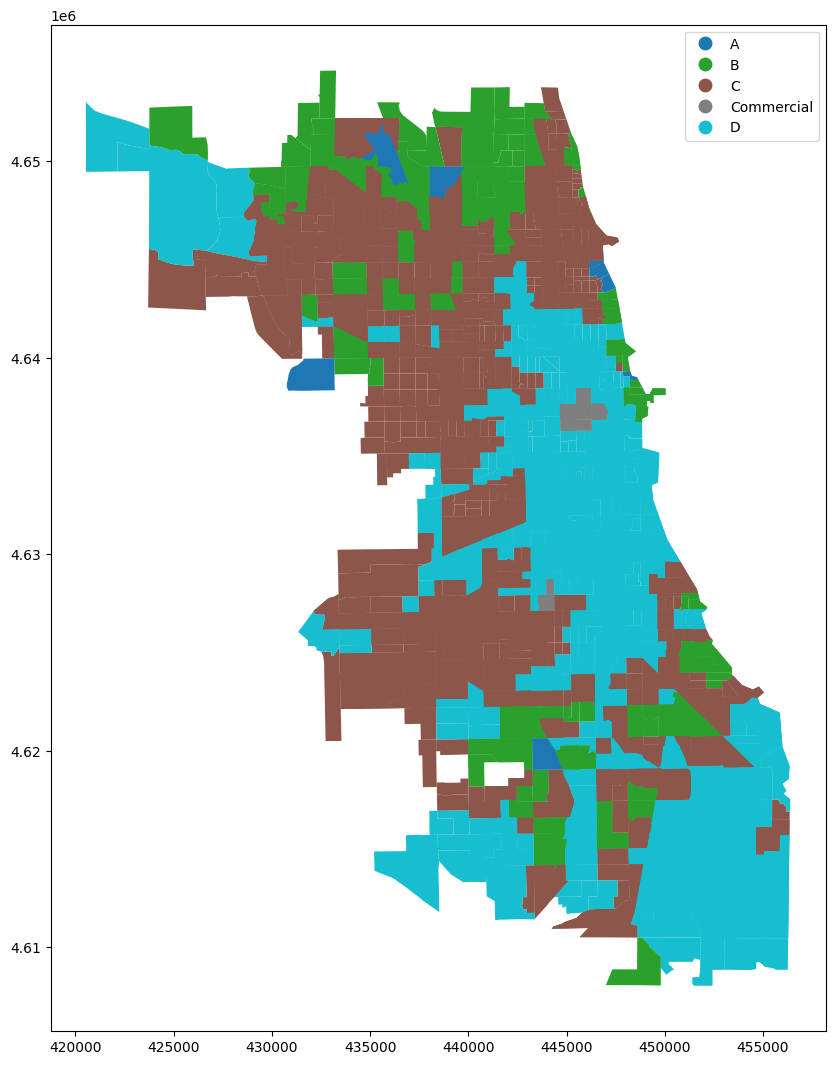

In [55]:
fig, ax = plt.subplots(figsize=(10, 20))
chicago_tracts.plot('pred_grade', ax=ax, legend=True)
#fatal_crashes.plot(ax=ax, alpha=1, markersize=.3, color='black')

In [90]:
tract_cents = gpd.GeoDataFrame(chicago_tracts[['GEOID']], geometry=chicago_tracts.geometry.centroid)
tract_grades = tract_cents.sjoin(redlining_2[['grade', 'geometry']], op='intersects')[['GEOID', 'grade']]

# fig, ax = plt.subplots(figsize=(10, 20))
# redlining_2.plot(ax=ax,facecolor='none')
# tract_cents.plot(ax=ax, markersize=.1, alpha=1)
chicago_tracts = chicago_tracts.merge(tract_grades, on='GEOID')

C:\Users\wimer\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [92]:
import numpy as np

#chicago_tracts.drop('index_right', axis=1, inplace=True)
counts = chicago_tracts\
    .sjoin(fatal_crashes[['geometry']], how='left', op='contains')\
    .groupby('GEOID')\
    .size()\
    .reset_index()\
    .rename({0:'num_deaths'}, axis=1)

counts['GEOID'] = counts['GEOID'].astype(np.int64)
chicago_tracts['GEOID'] = chicago_tracts['GEOID'].astype(np.int64)

tracts_with_deaths = chicago_tracts.merge(counts, on='GEOID', how='left')

C:\Users\wimer\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [94]:
tracts_with_deaths[['grade', 'num_deaths']]\
    .groupby('grade')\
        .aggregate(['sum', 'size', 'mean', 'var', 'median'])

num_deaths                                         
                  sum  size         mean           var  median
grade                                                         
A               21018    25   840.720000  2.941299e+05   816.0
B              823028   322  2555.987578  1.422961e+07   999.0
C             1638260  1497  1094.362057  1.652814e+06   636.0
Commercial    2423638   529  4581.546314  1.944636e+07  2944.0
D             2231982  1166  1914.221269  7.083762e+06   832.0

In [ ]:
tracts_a = tracts_with_deaths[tracts_with_deaths['pred_grade']=='A'].dissolve()
tracts_b = tracts_with_deaths[tracts_with_deaths['pred_grade']=='B'].dissolve()
tracts_c = tracts_with_deaths[tracts_with_deaths['pred_grade']=='C'].dissolve()
tracts_d = tracts_with_deaths[tracts_with_deaths['pred_grade']=='D'].dissolve()

Text(0.5, 1.0, 'Automotive Deaths !')

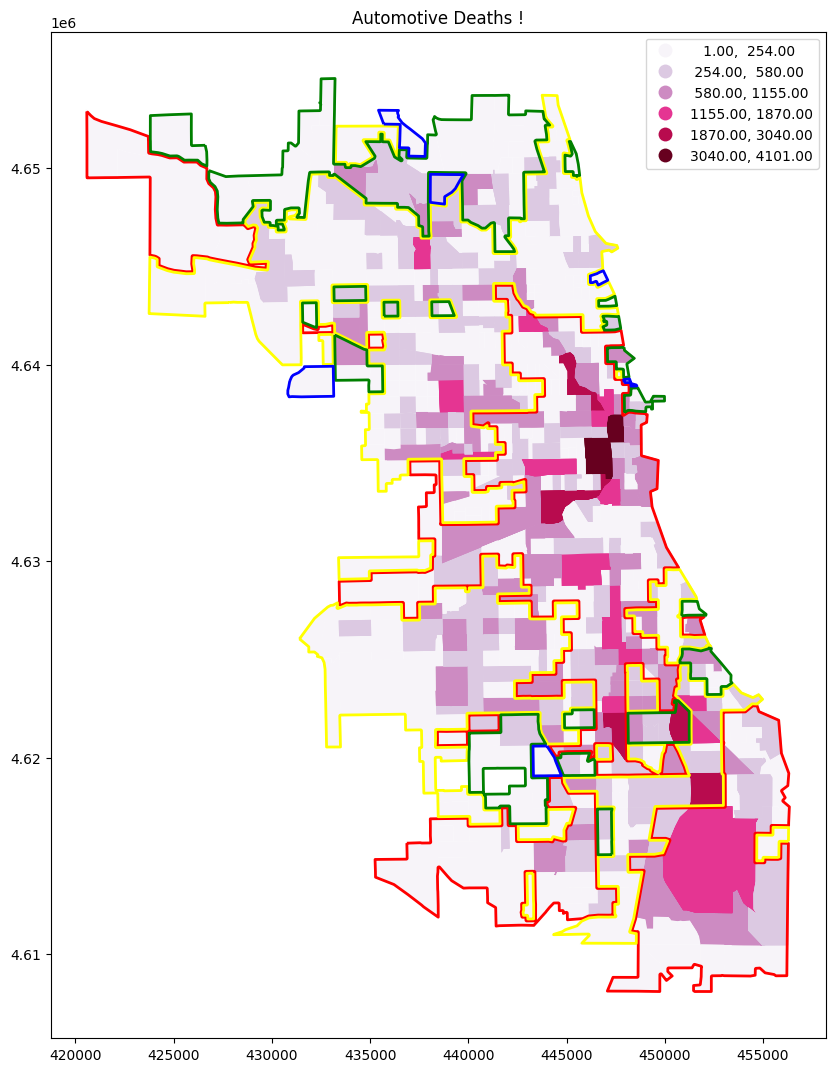

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
tracts_with_deaths.plot('num_deaths', ax=ax, legend=True, scheme='FisherJenks', alpha=1, cmap='PuRd', k=6, cax=fig)
tracts_d.buffer(-50).plot(ax=ax, facecolor='none', linewidth=2, edgecolor='red')
tracts_c.buffer(-50).plot(ax=ax, facecolor='none', linewidth=2, edgecolor='yellow')
tracts_b.buffer(-50).plot(ax=ax, facecolor='none', linewidth=2, edgecolor='green')
tracts_a.buffer(-50).plot(ax=ax, facecolor='none', linewidth=2, edgecolor='blue')

fig.set_label('Automotive Accident Deaths')
ax.set_title('Automotive Deaths !')